# Heads and tail simulation

This notebook will simulate which strategy is best when playing a game of heads and tails for a given strategy.

In [28]:
# make a class to play the game
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def coin_flip():
    return 'heads' if np.random.rand() > 0.5 else 'tails'

class Player:
    
    def __init__(self, ID):
        
        self.ID = ID
        
        self.in_game = True
        
        self.guess = None
        self.guess_history = []
        
        
    def set_choice(self, choice = None):
        
        # returns a random value if no choice is given
        if choice is not None:
            self.guess = choice
        else:
            self.guess = coin_flip()
            
        self.guess_history.append(self.guess)
        
    def reset(self):
        
        self.in_game = True
        self.guess = None
        self.guess_history = []
        

class HeadsAndTails:
    
    def __init__(self):
        
        self.teams = {}
        self.coin_flip_history = []
        self.players_in_game = None
        self.teams_in_game = None
        self.round = 0 
    
    def add_team(self, Team):
        
        if Team.name is not None:
            self.teams[Team.name] = Team
        else:
            self.teams[len(self.teams) + 1] = Team
    
    def do_round(self, verbose=False):
        self.round += 1
        
        if verbose:
            print(f'Round {self.round}')
        
        flip_outcome = coin_flip()
        self.coin_flip_history.append(flip_outcome)
        
        # get remaining players
        remaining = []
        for name, team in self.teams.items():
            remaining += team.get_remaining_players()
            
            if verbose:
                print(f'{name} has {team.get_num_remaining_players()} players left')
        
        # finde number of players in game
        self.players_in_game = 0
        self.teams_in_game = 0
        for name, team in self.teams.items():
            team.set_guesses(self.round)
            team.do_round(flip_outcome)
            self.players_in_game += team.get_num_remaining_players()
            if team.get_num_remaining_players() > 0:
                self.teams_in_game += 1
        
        # game is over if only one player left    
        if self.players_in_game == 1:
            return False
        
        # game is also over if only one team is left
        if self.teams_in_game == 1:
            return False
        
        # otherwise put players back in for another round
        if self.players_in_game == 0:
            for player in remaining:
                player.in_game = True
        
        if verbose:
            print(f'Players Left in game: {self.players_in_game}')
                
        return True
    
    def play(self, verbose=False):
        
        if verbose:
            print("\n### Start of game ###")
        
        players_left = True
        while players_left:
            players_left = self.do_round(verbose)
            
        # find the winner
        for name, team in self.teams.items():
            if team.get_num_remaining_players() > 0:
                return name
            
    def reset(self):
        for name, team in self.teams.items():
            team.reset()
            
        self.coin_flip_history = []
        self.players_in_game = None
        self.teams_in_game = None
        self.round = 0 
    
            
class Team:
    
    def __init__(self, players, name=None, strategy=None):
        
        self.name = name
        self.players = [Player(p) for p in range(players)]
        
        # strategy must be a function which takes in players and sets their guess
        self.strategy = strategy 
        
        
    def set_guesses(self, round_number):
        self.strategy(self.players, round_number)
        
    def get_guesses(self):
        return [player.guess for player in self.players]
        
    def do_round(self, flip_outcome):
        for player in self.players:
            if not player.guess == flip_outcome:
                player.in_game = False
                
    def get_num_remaining_players(self):
        remaining = 0
        for player in self.players:
            if player.in_game:
                remaining += 1
        return remaining
    
    def get_remaining_players(self):
        players = []
        for player in self.players:
            if player.in_game:
                players.append(player)
        return players
    
    def reset(self):
        for player in self.players:
            player.reset()
        
        
        
def plot_results(results, order=None):
    fig, ax = plt.subplots(1,1, dpi=150)
    sns.barplot(data=df, ax=ax, order=order)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_ylabel('Wins')

In [21]:
# strategies

def random_strategy(players, round_number):
    for p in players:
        p.set_choice()
        
def all_same_first_round(players, round_number):
    if round_number == 1:
        choice = coin_flip()
        for p in players:
            p.set_choice(choice)
    else:
        random_strategy(players, round_number)
            
def all_same_first_round_fifty_fifty(players, round_number):
    if round_number == 1:
        choice = coin_flip()
        for p in players:
            p.set_choice(choice)
    else:
        fifty_fifty(players, round_number)
        
def all_same_first_second_round_fifty_fifty(players, round_number):
    if round_number in [1,2]:
        choice = coin_flip()
        for p in players:
            p.set_choice(choice)
    else:
        fifty_fifty(players, round_number)
        
def all_same_second_round_fifty_fifty(players, round_number):
    if round_number == 2:
        choice = coin_flip()
        for p in players:
            p.set_choice(choice)
    else:
        fifty_fifty(players, round_number)
        
def all_same_third_round_fifty_fifty(players, round_number):
    if round_number == 3:
        choice = coin_flip()
        for p in players:
            p.set_choice(choice)
    else:
        fifty_fifty(players, round_number)
            
def all_heads(players, round_number):
    for p in players:
        p.set_choice('heads')
        
def all_tails(players, round_number):
    for p in players:
        p.set_choice('tails')
        
def fifty_fifty(players, round_number):
    # find players in game
    playing = []
    for p in players:
        if p.in_game:
            playing.append(p)
    half = len(playing) / 2
    if len(playing) == 1:
        playing[0].set_choice()
        return
    for i, p in enumerate(playing):
        if i < half:
            p.set_choice('heads')
        else:
            p.set_choice('tails')
    


# Exploration of different strategies

Now we have a way to simulate the game, we can explore different strategies and see if there is anything to be gained from using a strategy. 

## Effect of team size

Exlore team size we will have all teams employ a random strategy but make them different sizes. 

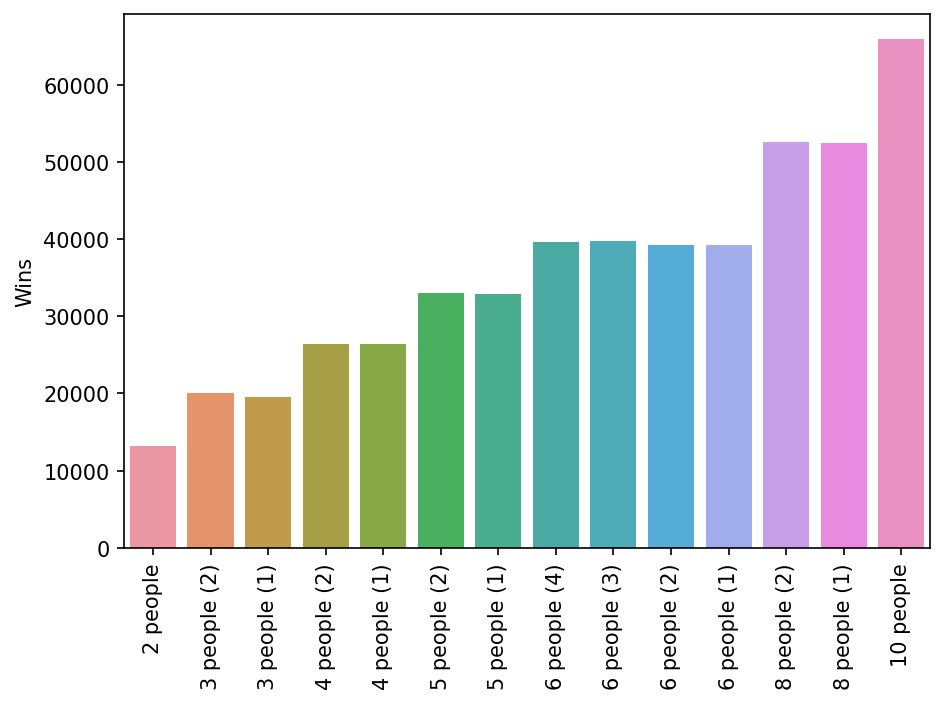

In [3]:
n_games = 500000
results = []

game = HeadsAndTails()
game.add_team(Team(10, name='10 people', strategy=random_strategy))
game.add_team(Team(8, name='8 people (1)', strategy=random_strategy))
game.add_team(Team(8, name='8 people (2)', strategy=random_strategy))
game.add_team(Team(6, name='6 people (1)', strategy=random_strategy))
game.add_team(Team(6, name='6 people (2)', strategy=random_strategy))
game.add_team(Team(6, name='6 people (3)', strategy=random_strategy))
game.add_team(Team(6, name='6 people (4)', strategy=random_strategy))
game.add_team(Team(5, name='5 people (1)', strategy=random_strategy))
game.add_team(Team(5, name='5 people (2)', strategy=random_strategy))
game.add_team(Team(4, name='4 people (1)', strategy=random_strategy))
game.add_team(Team(4, name='4 people (2)', strategy=random_strategy))
game.add_team(Team(3, name='3 people (1)', strategy=random_strategy))
game.add_team(Team(3, name='3 people (2)', strategy=random_strategy))
game.add_team(Team(2, name='2 people', strategy=random_strategy))

for i in range(n_games):
    results.append(game.play(verbose=False))
    game.reset()
    
analysed_results = {}
for team in set(results):
    analysed_results[team] = {0: results.count(team)}
    
df = pd.DataFrame(analysed_results)

plot_results(
    analysed_results, 
    order=list(reversed([
        '10 people', 
        '8 people (1)', '8 people (2)', 
        '6 people (1)', '6 people (2)', '6 people (3)', '6 people (4)',
        '5 people (1)', '5 people (2)',
        '4 people (1)', '4 people (2)',
        '3 people (1)', '3 people (2)',
        '2 people' 
    ])))
plt.tight_layout()
plt.show()

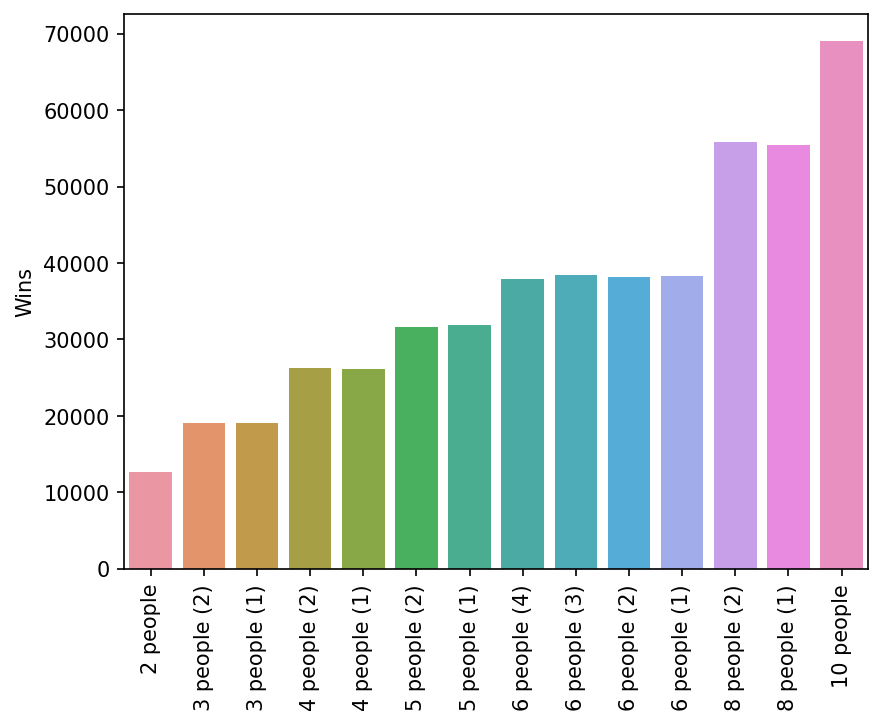

In [4]:
n_games = 500000
results = []

game = HeadsAndTails()
game.add_team(Team(10, name='10 people', strategy=fifty_fifty))
game.add_team(Team(8, name='8 people (1)', strategy=fifty_fifty))
game.add_team(Team(8, name='8 people (2)', strategy=fifty_fifty))
game.add_team(Team(6, name='6 people (1)', strategy=fifty_fifty))
game.add_team(Team(6, name='6 people (2)', strategy=fifty_fifty))
game.add_team(Team(6, name='6 people (3)', strategy=fifty_fifty))
game.add_team(Team(6, name='6 people (4)', strategy=fifty_fifty))
game.add_team(Team(5, name='5 people (1)', strategy=fifty_fifty))
game.add_team(Team(5, name='5 people (2)', strategy=fifty_fifty))
game.add_team(Team(4, name='4 people (1)', strategy=fifty_fifty))
game.add_team(Team(4, name='4 people (2)', strategy=fifty_fifty))
game.add_team(Team(3, name='3 people (1)', strategy=fifty_fifty))
game.add_team(Team(3, name='3 people (2)', strategy=fifty_fifty))
game.add_team(Team(2, name='2 people', strategy=fifty_fifty))

for i in range(n_games):
    results.append(game.play(verbose=False))
    game.reset()
    
analysed_results = {}
for team in set(results):
    analysed_results[team] = {0: results.count(team)}
    
df = pd.DataFrame(analysed_results)

plot_results(
    analysed_results, 
    order=list(reversed([
        '10 people', 
        '8 people (1)', '8 people (2)', 
        '6 people (1)', '6 people (2)', '6 people (3)', '6 people (4)',
        '5 people (1)', '5 people (2)',
        '4 people (1)', '4 people (2)',
        '3 people (1)', '3 people (2)',
        '2 people' 
    ])))

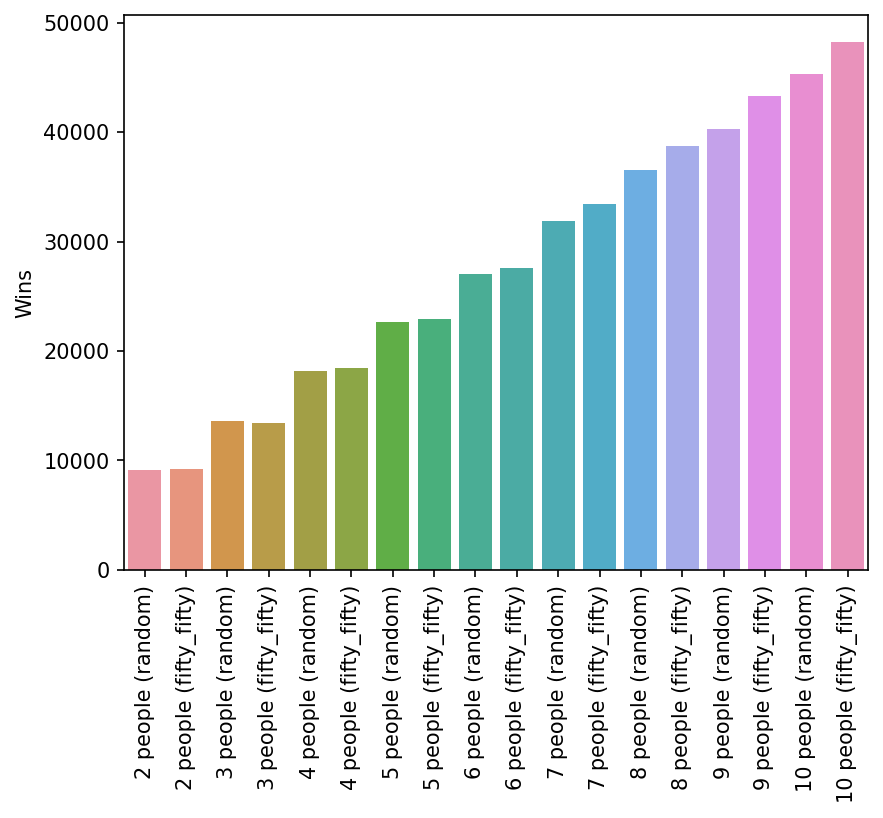

In [5]:
n_games = 500000
results = []

game = HeadsAndTails()
order = []
for i in range(2,11):
    
    name1 = f'{i} people (random)'
    name2 = f'{i} people (fifty_fifty)'
    
    game.add_team(Team(i, name=name1, strategy=random_strategy))
    game.add_team(Team(i, name=name2, strategy=fifty_fifty))
    
    order.append(name1)
    order.append(name2)

for i in range(n_games):
    results.append(game.play(verbose=False))
    game.reset()
    
analysed_results = {}
for team in set(results):
    analysed_results[team] = {0: results.count(team)}
    
df = pd.DataFrame(analysed_results)

plot_results(
    analysed_results, 
    order=order
)

# Explore different strategies

To explore different strategies we will have the different strategies battle teams of the same size which all use a random strategy.

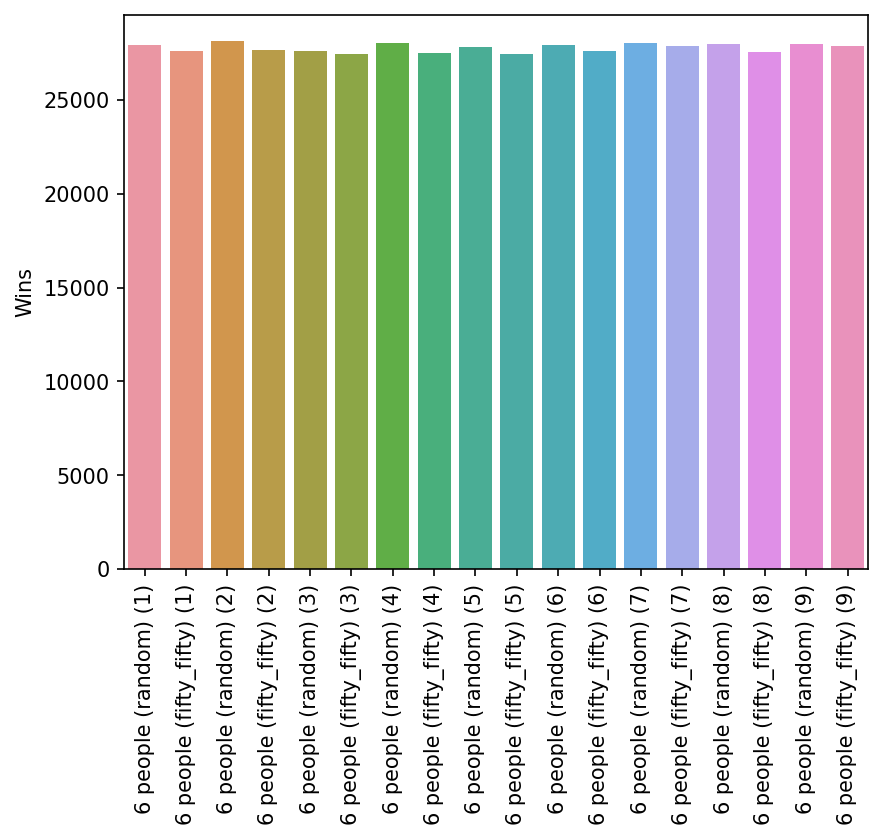

In [6]:
n_games = 500000
results = []

game = HeadsAndTails()

order = []
for i in range(1,10):
    
    name1 = f'6 people (random) ({i})'
    name2 = f'6 people (fifty_fifty) ({i})'
    
    game.add_team(Team(6, name=name1, strategy=random_strategy))
    game.add_team(Team(6, name=name2, strategy=fifty_fifty))
    
    order.append(name1)
    order.append(name2)

for i in range(n_games):
    results.append(game.play(verbose=False))
    game.reset()
    
analysed_results = {}
for team in set(results):
    analysed_results[team] = {0: results.count(team)}
    
df = pd.DataFrame(analysed_results)

plot_results(
    analysed_results, 
    order=order
)

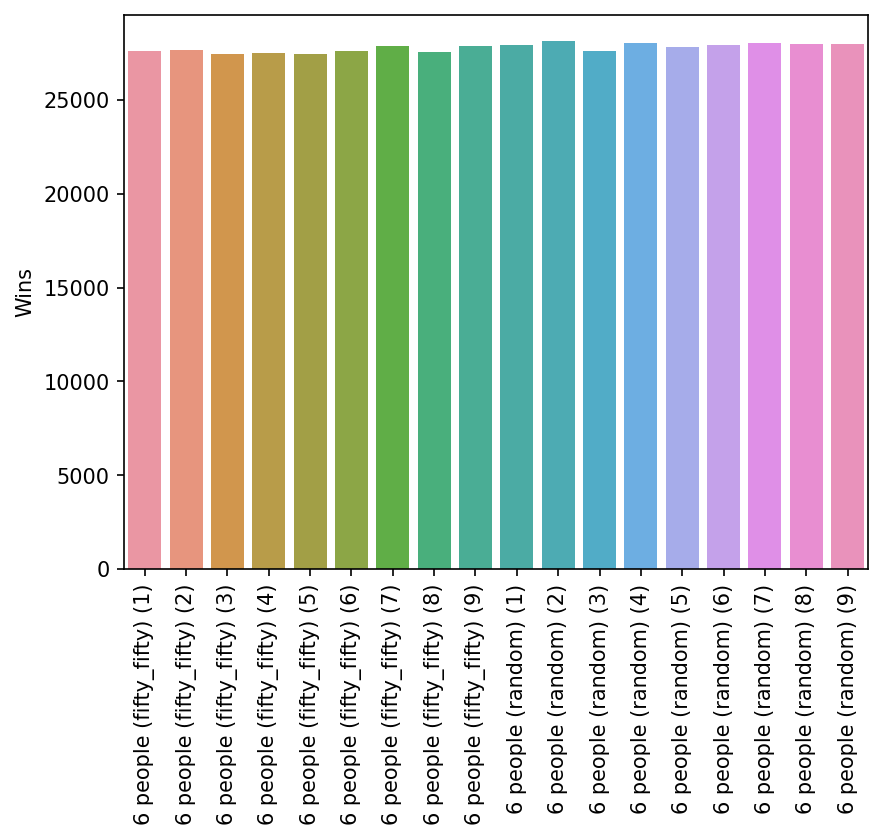

In [7]:
plot_results(
    analysed_results, 
    order=sorted(order)
)

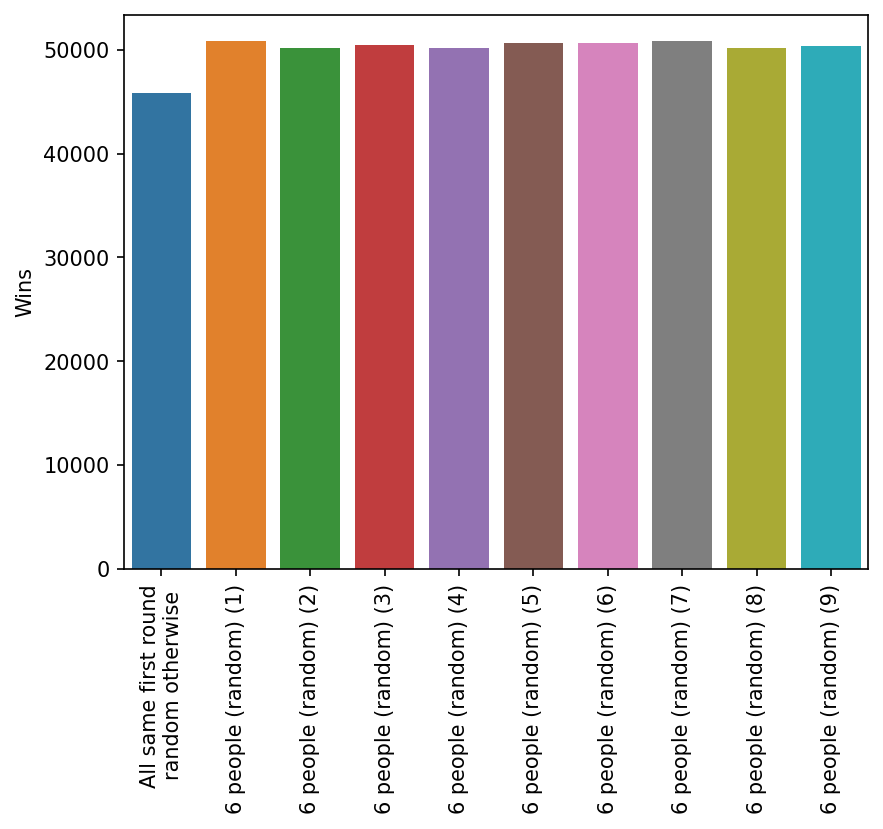

In [42]:
n_games = 500000
results = []

game = HeadsAndTails()

game.add_team(Team(6, name='All same first round\nrandom otherwise', strategy=all_same_first_round))

order = ['All same first round\nrandom otherwise']
for i in range(1,10):
    
    name = f'6 people (random) ({i})'
    game.add_team(Team(6, name=name, strategy=random_strategy))
    order.append(name)


for i in range(n_games):
    results.append(game.play())
    game.reset()
    
analysed_results = {}
for t in set(results):
    analysed_results[t] = {0: results.count(t)}
    
df = pd.DataFrame(analysed_results)

plot_results(analysed_results,order=order)

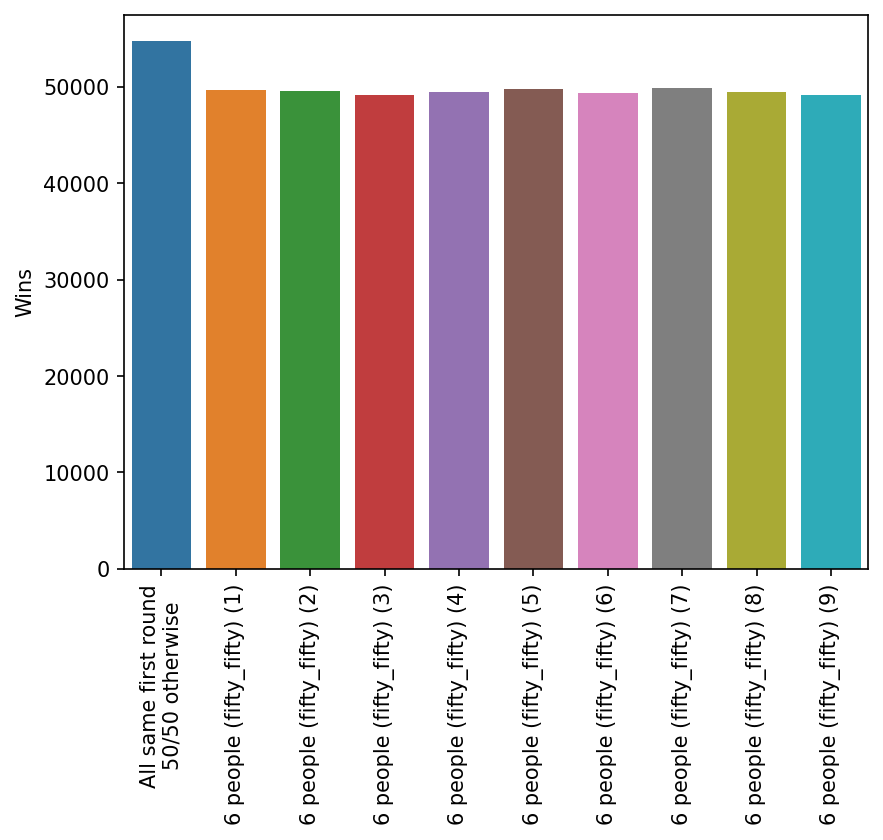

In [41]:
n_games = 500000
results = []

game = HeadsAndTails()

game.add_team(Team(6, name='All same first round\n50/50 otherwise', strategy=all_same_first_round_fifty_fifty))

order = ['All same first round\n50/50 otherwise']
for i in range(1,10):
    
    name = f'6 people (fifty_fifty) ({i})'
    game.add_team(Team(6, name=name, strategy=fifty_fifty))
    order.append(name)


for i in range(n_games):
    results.append(game.play())
    game.reset()
    
analysed_results = {}
for t in set(results):
    analysed_results[t] = {0: results.count(t)}
    
df = pd.DataFrame(analysed_results)

plot_results(analysed_results,order=order)

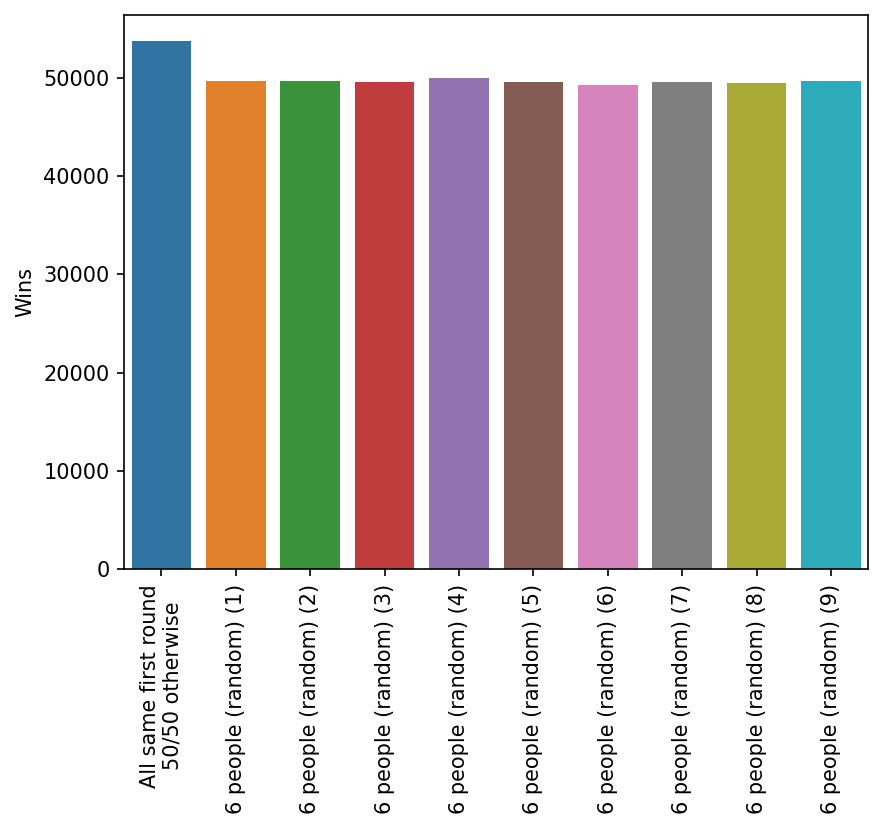

In [40]:
n_games = 500000
results = []

game = HeadsAndTails()

game.add_team(Team(6, name='All same first round\n50/50 otherwise', strategy=all_same_first_round_fifty_fifty))

order = ['All same first round\n50/50 otherwise']
for i in range(1,10):
    
    name = f'6 people (random) ({i})'
    game.add_team(Team(6, name=name, strategy=random_strategy))
    order.append(name)


for i in range(n_games):
    results.append(game.play())
    game.reset()
    
analysed_results = {}
for t in set(results):
    analysed_results[t] = {0: results.count(t)}
    
df = pd.DataFrame(analysed_results)

plot_results(analysed_results,order=order)

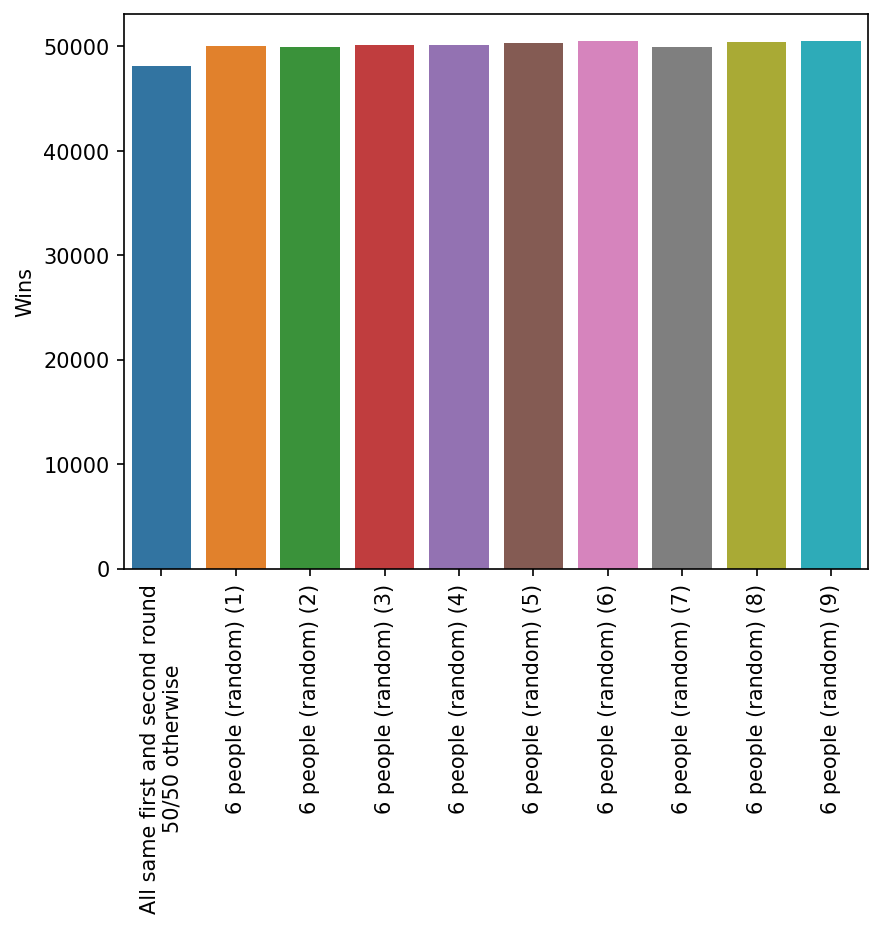

In [39]:
n_games = 500000
results = []

game = HeadsAndTails()

game.add_team(Team(6, name='All same first and second round\n50/50 otherwise', strategy=all_same_first_second_round_fifty_fifty))

order = ['All same first and second round\n50/50 otherwise']
for i in range(1,10):
    
    name = f'6 people (random) ({i})'
    game.add_team(Team(6, name=name, strategy=random_strategy))
    order.append(name)


for i in range(n_games):
    results.append(game.play())
    game.reset()
    
analysed_results = {}
for t in set(results):
    analysed_results[t] = {0: results.count(t)}
    
df = pd.DataFrame(analysed_results)

plot_results(analysed_results,order=order)

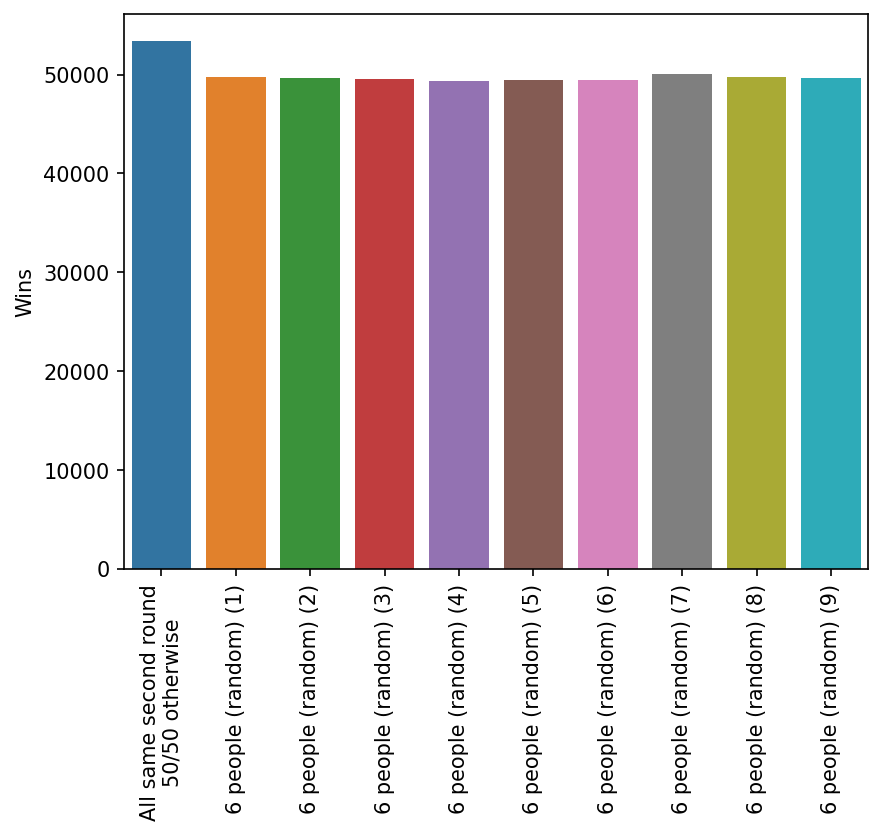

In [38]:
n_games = 500000
results = []

game = HeadsAndTails()

game.add_team(Team(6, name='All same second round\n50/50 otherwise', strategy=all_same_second_round_fifty_fifty))

order = ['All same second round\n50/50 otherwise']
for i in range(1,10):
    
    name = f'6 people (random) ({i})'
    game.add_team(Team(6, name=name, strategy=random_strategy))
    order.append(name)


for i in range(n_games):
    results.append(game.play())
    game.reset()
    
analysed_results = {}
for t in set(results):
    analysed_results[t] = {0: results.count(t)}
    
df = pd.DataFrame(analysed_results)

plot_results(analysed_results,order=order)

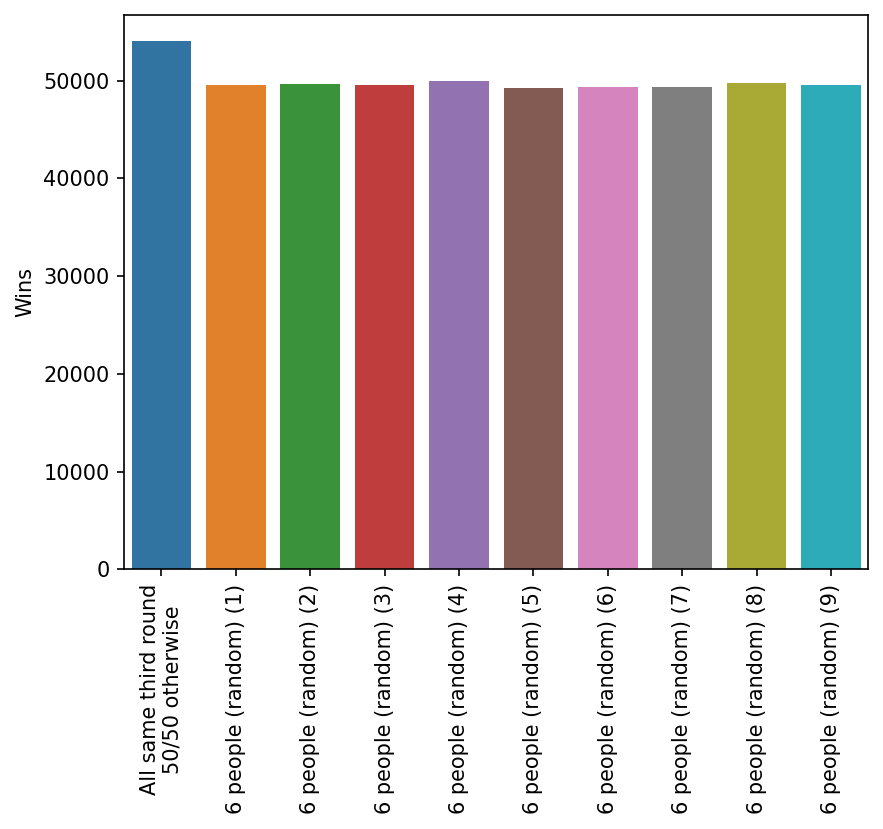

In [37]:
n_games = 500000
results = []

game = HeadsAndTails()

game.add_team(Team(6, name='All same third round\n50/50 otherwise', strategy=all_same_third_round_fifty_fifty))

order = ['All same third round\n50/50 otherwise']
for i in range(1,10):
    
    name = f'6 people (random) ({i})'
    game.add_team(Team(6, name=name, strategy=random_strategy))
    order.append(name)


for i in range(n_games):
    results.append(game.play())
    game.reset()
    
analysed_results = {}
for t in set(results):
    analysed_results[t] = {0: results.count(t)}
    
df = pd.DataFrame(analysed_results)

plot_results(analysed_results,order=order)

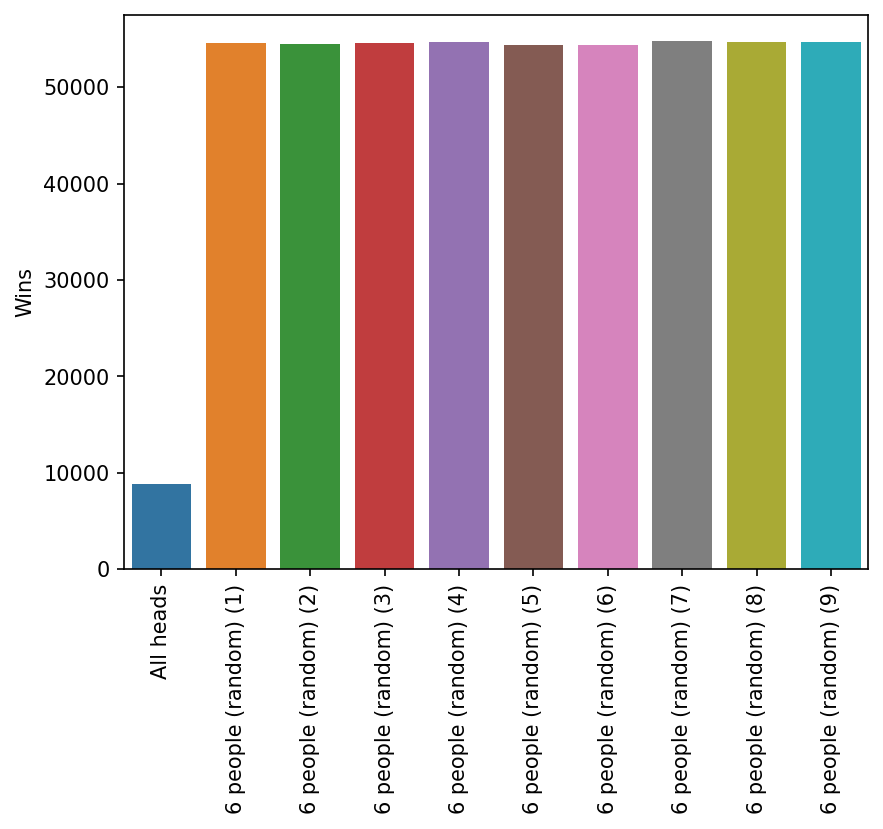

In [36]:
n_games = 500000
results = []

game = HeadsAndTails()

game.add_team(Team(6, name='All heads', strategy=all_heads))

order = ['All heads']
for i in range(1,10):
    
    name = f'6 people (random) ({i})'
    game.add_team(Team(6, name=name, strategy=random_strategy))
    order.append(name)


for i in range(n_games):
    results.append(game.play())
    game.reset()
    
analysed_results = {}
for t in set(results):
    analysed_results[t] = {0: results.count(t)}
    
df = pd.DataFrame(analysed_results)

plot_results(analysed_results,order=order)

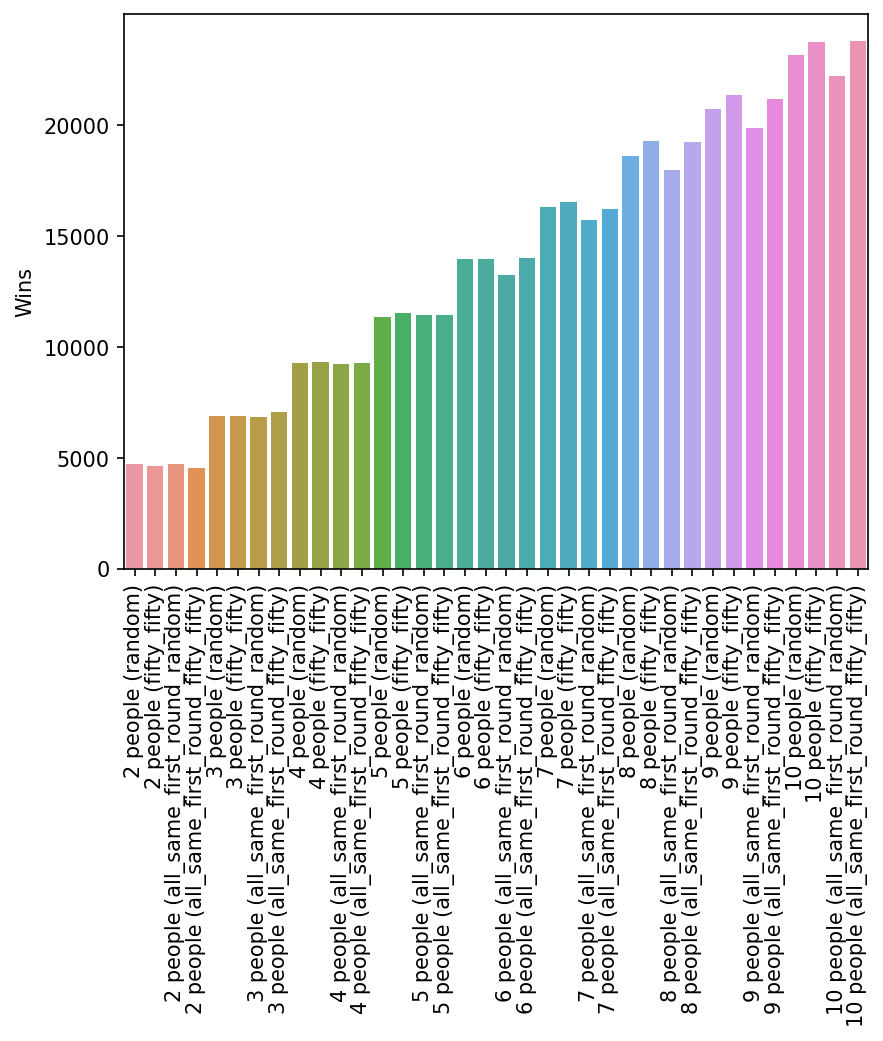

In [12]:
n_games = 500000
results = []

game = HeadsAndTails()
order = []
for i in range(2,11):
    
    name1 = f'{i} people (random)'
    name2 = f'{i} people (fifty_fifty)'
    name3 = f'{i} people (all_same_first_round_random)'
    name4 = f'{i} people (all_same_first_round_fifty_fifty)'
    
    game.add_team(Team(i, name=name1, strategy=random_strategy))
    game.add_team(Team(i, name=name2, strategy=fifty_fifty))
    game.add_team(Team(i, name=name3, strategy=all_same_first_round))
    game.add_team(Team(i, name=name4, strategy=all_same_first_round_fifty_fifty))
    
    order.append(name1)
    order.append(name2)
    order.append(name3)
    order.append(name4)

for i in range(n_games):
    results.append(game.play(verbose=False))
    game.reset()
    
analysed_results = {}
for team in set(results):
    analysed_results[team] = {0: results.count(team)}
    
df = pd.DataFrame(analysed_results)

plot_results(
    analysed_results, 
    order=order
)

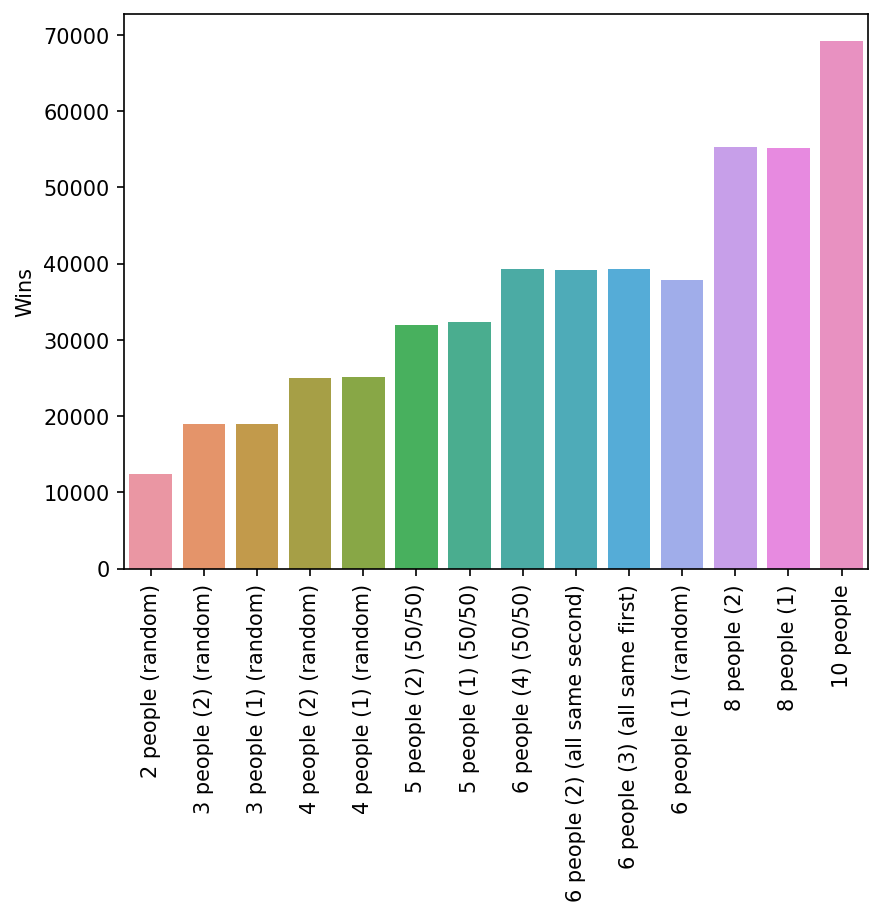

In [35]:
n_games = 500000
results = []

game = HeadsAndTails()
game.add_team(Team(10, name='10 people', strategy=fifty_fifty))
game.add_team(Team(8, name='8 people (1)', strategy=fifty_fifty))
game.add_team(Team(8, name='8 people (2)', strategy=fifty_fifty))
game.add_team(Team(6, name='6 people (1) (random)', strategy=random_strategy))
game.add_team(Team(6, name='6 people (2) (all same second)', strategy=all_same_second_round_fifty_fifty))
game.add_team(Team(6, name='6 people (3) (all same first)', strategy=all_same_first_round_fifty_fifty))
game.add_team(Team(6, name='6 people (4) (50/50)', strategy=fifty_fifty))
game.add_team(Team(5, name='5 people (1) (50/50)', strategy=fifty_fifty))
game.add_team(Team(5, name='5 people (2) (50/50)', strategy=fifty_fifty))
game.add_team(Team(4, name='4 people (1) (random)', strategy=random_strategy))
game.add_team(Team(4, name='4 people (2) (random)', strategy=random_strategy))
game.add_team(Team(3, name='3 people (1) (random)', strategy=random_strategy))
game.add_team(Team(3, name='3 people (2) (random)', strategy=random_strategy))
game.add_team(Team(2, name='2 people (random)', strategy=random_strategy))

for i in range(n_games):
    results.append(game.play(verbose=False))
    game.reset()
    
analysed_results = {}
for team in set(results):
    analysed_results[team] = {0: results.count(team)}
    
df = pd.DataFrame(analysed_results)

plot_results(
    analysed_results, 
    order=list(reversed([
        '10 people', 
        '8 people (1)', '8 people (2)', 
        '6 people (1) (random)', '6 people (3) (all same first)', '6 people (2) (all same second)', '6 people (4) (50/50)',
        '5 people (1) (50/50)', '5 people (2) (50/50)',
        '4 people (1) (random)', '4 people (2) (random)',
        '3 people (1) (random)', '3 people (2) (random)',
        '2 people (random)' 
    ])))